# Disease prediction

In this lab we're gonna work with data from heart disease dataset. We're gonna start to load the dataset from Kaggle, and get info on what the features definition is. Note that there are lot of errors in this dataset, for example: negative blood pressure och blood pressures that is unreasonable high.

### Quick check with google give me these values
* Age Range	Normal Blood Pressure Range (mmHg)
* Newborn	60/30 - 90/60
* Infants	85/50 - 95/65
* Children	90/55 - 110/75
* Adolescents	100/60 - 120/80
* Adults	90/60 - 120/80
* Adults	120/80 - 140/90
* Adults	140/90 - 160/100
* Adults	160/100 - 180/110
* Adults	180/110 or higher
# TODO: Get official statistics of this. 

There are 3 types of input features:

* Objective: factual information;
* Examination: results of medical examination;
* Subjective: information given by the patient.

## Features
* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [1]:
import os


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data science
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from scipy.stats import norm

# Set a default plt style
plt.style.use('ggplot')

In [2]:
file = '/Users/joeloscarsson/Documents/www/Machine-Learning/Projects/data3/cardio_train.csv'

In [3]:
cardio_train_df = pd.read_csv(file, delimiter=';')
nRow, nCol = cardio_train_df.shape
print(f"There are {nRow} rows and {nCol} columns")
print(cardio_train_df.columns)

There are 70000 rows and 13 columns
Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [4]:
cardio_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# 2.0 EDA

a) How many are positive for hear disease and how many is negative?

We have this feature variable so we're take a closer look:

* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

0    35021
1    34979
Name: cardio, dtype: int64


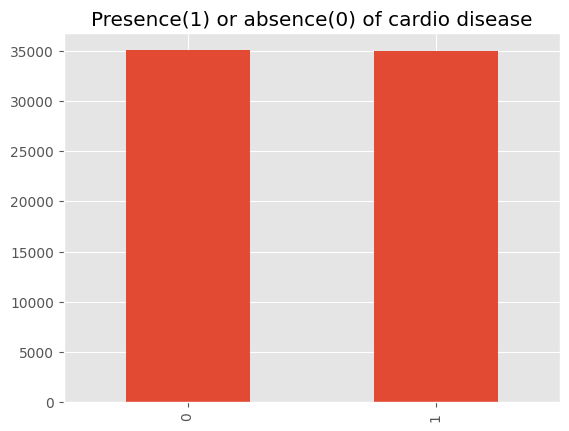

In [5]:
# We have 2 classes, 0 and 1. 0 means no cardio disease and 1 means cardio disease.
cardio_train_df['cardio'].value_counts().plot(kind='bar', title='Presence(1) or absence(0) of cardio disease')
print(cardio_train_df['cardio'].value_counts())


Almost 50/50

b) The share of how many normal, over normal and far above normal cholestrol

In [6]:
cardio_train_df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

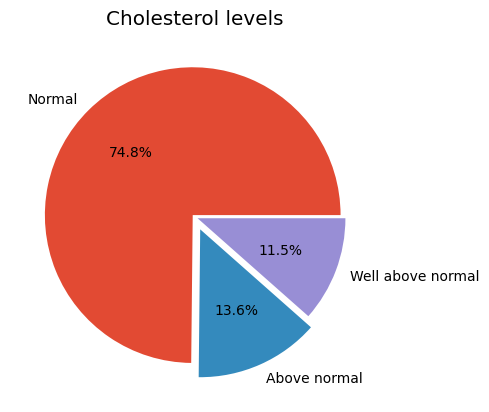

In [7]:
explode = (0.02, 0.09, 0.02)
plt.pie(cardio_train_df['cholesterol'].value_counts(), labels=['Normal', 'Above normal', 'Well above normal'], autopct='%1.1f%%', explode= explode );
plt.title('Cholesterol levels');

In [8]:
cardio_train_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


c) Age distribution histogram

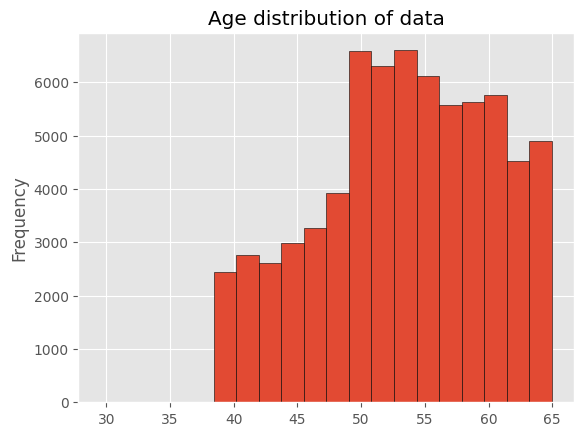

In [49]:
cardio_train_series = cardio_train_df['age'] / 365

cardio_train_series.plot(kind='hist', bins=20, title='Age distribution of data', edgecolor='black', linewidth=0.4);


d) Portion that smokes

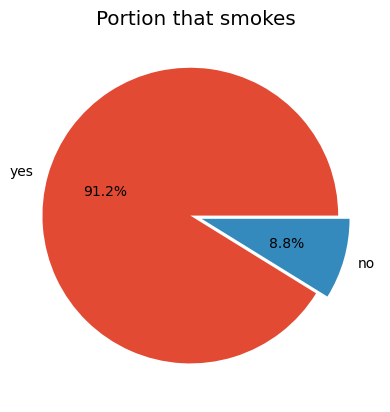

In [55]:
explode = (0.04, 0.04)
plt.pie(cardio_train_df['smoke'].value_counts(), labels=['yes', 'no'], autopct='%1.1f%%', explode= explode );
plt.title('Portion that smokes');